##### About DataSet and More

    Netflix, founded in 1997, revolutionized entertainment by transitioning from DVD rentals to streaming in 2007. 
    With a vast global subscriber base and a diverse content library, Netflix has driven the shift from traditional 
    TV to on-demand streaming, alongside competitors like Hulu, Amazon Prime, and Disney+. This analysis explores 
    Netflix's content trends, regional preferences, and demographic targeting strategies, examining factors like 
    content types, genre popularity, and release trends. The dataset, consisting of 7,787 rows and 12 columns, 
    provides insights into Netflix titles, including category, country of origin, and release year, offering valuable 
    data for strategic content decisions.


| Column      | Description                                                                 |
|-------------|-----------------------------------------------------------------------------|
| `show_id`   | Unique identifier for each title.                                           |
| `type`      | Specifies whether the title is a "Movie" or "TV Show".                      |
| `title`     | Name of the title.                                                          |
| `director`  | Director of the title (if applicable).                                      |
| `cast`      | List of main cast members.                                                  |
| `country`   | Country where the content was produced.                                     |
| `date_added`| Date when the title was added to Netflix.                                   |
| `release_year` | Year the title was released.                                            |
| `rating`    | Content rating (e.g., TV-MA, PG-13).                                        |
| `duration`  | Duration of the title (minutes for Movies, seasons for TV Shows).           |
| `listed_in` | Genres associated with the title.                                           |
| `description` | Brief summary of the title.                                              |

##### Importing Required Libraries.

In [43]:
import pandas as pd, numpy as np
import seaborn as sns, plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from wordcloud import WordCloud
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

##### Fetching the Data

In [2]:
netflix_df = pd.read_csv('netflix_dataset.csv')
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0  14-Aug-20          2020  TV-MA  4 Seasons   
1  23-Dec-16          2016  TV-MA     93 min   
2  20-Dec-18          2011      R     78 min   
3  16-Nov-17          2009  PG-13     80 min   
4   1-Jan-20          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

##### Now Working on Exploratory Data Analysis (EDA)::

In [3]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
netflix_df.shape

(7787, 12)

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
netflix_df.describe().transpose()

count        mean       std     min     25%     50%     75%  \
release_year  7787.0  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0   

                 max  
release_year  2021.0

    Talking About Data Set we got Some insights like :- 
        1. This contains show data of Shows that added in the particular period of time.
        2. It contains 7,787 rows and 12 columns where only 1 column is Numeric other are Categorical.
        3. As this dataset also have some empty valse so need to manage it as per our need.
        
    Lets work on missing data or records also.

In [7]:
netflix_df.duplicated().sum()

0

In [8]:
netflix_df.drop_duplicates()

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country date_added  \
0                                                Brazil  14-Aug-20   
1                                                Mexico  23-Dec-16   
2                                             Singapore  20-Dec-18   
3                                         United States  16-Nov-17   
4                                         United States   1-Jan-20   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...  19-Oct-20   
7783                                              India   2-Mar-19   
7784                                                NaN  25-Sep-20   
7785                                          Australia  31-Oct-20   
7786              United Kingdom, Canada, United States   1-Mar-20   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a p

In [9]:
null_count = netflix_df.isna().sum().sort_values(ascending = False)
null_count[null_count > 0]

director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

In [10]:
null_perc = netflix_df.isna().sum()/len(netflix_df) * 100
null_perc[null_count > 0]

director      30.679337
cast           9.220496
country        6.510851
date_added     0.128419
rating         0.089893
dtype: float64

    We'll seems that we have around some Null Values where we got :- 
        director - 30%,     cast - 9%,     country - 6%,     date_added - 0%,    rating - 0%
    So for the director we need to solve the problem here but for others 
    We dont have any issues so more to impute i think.

<Axes: >

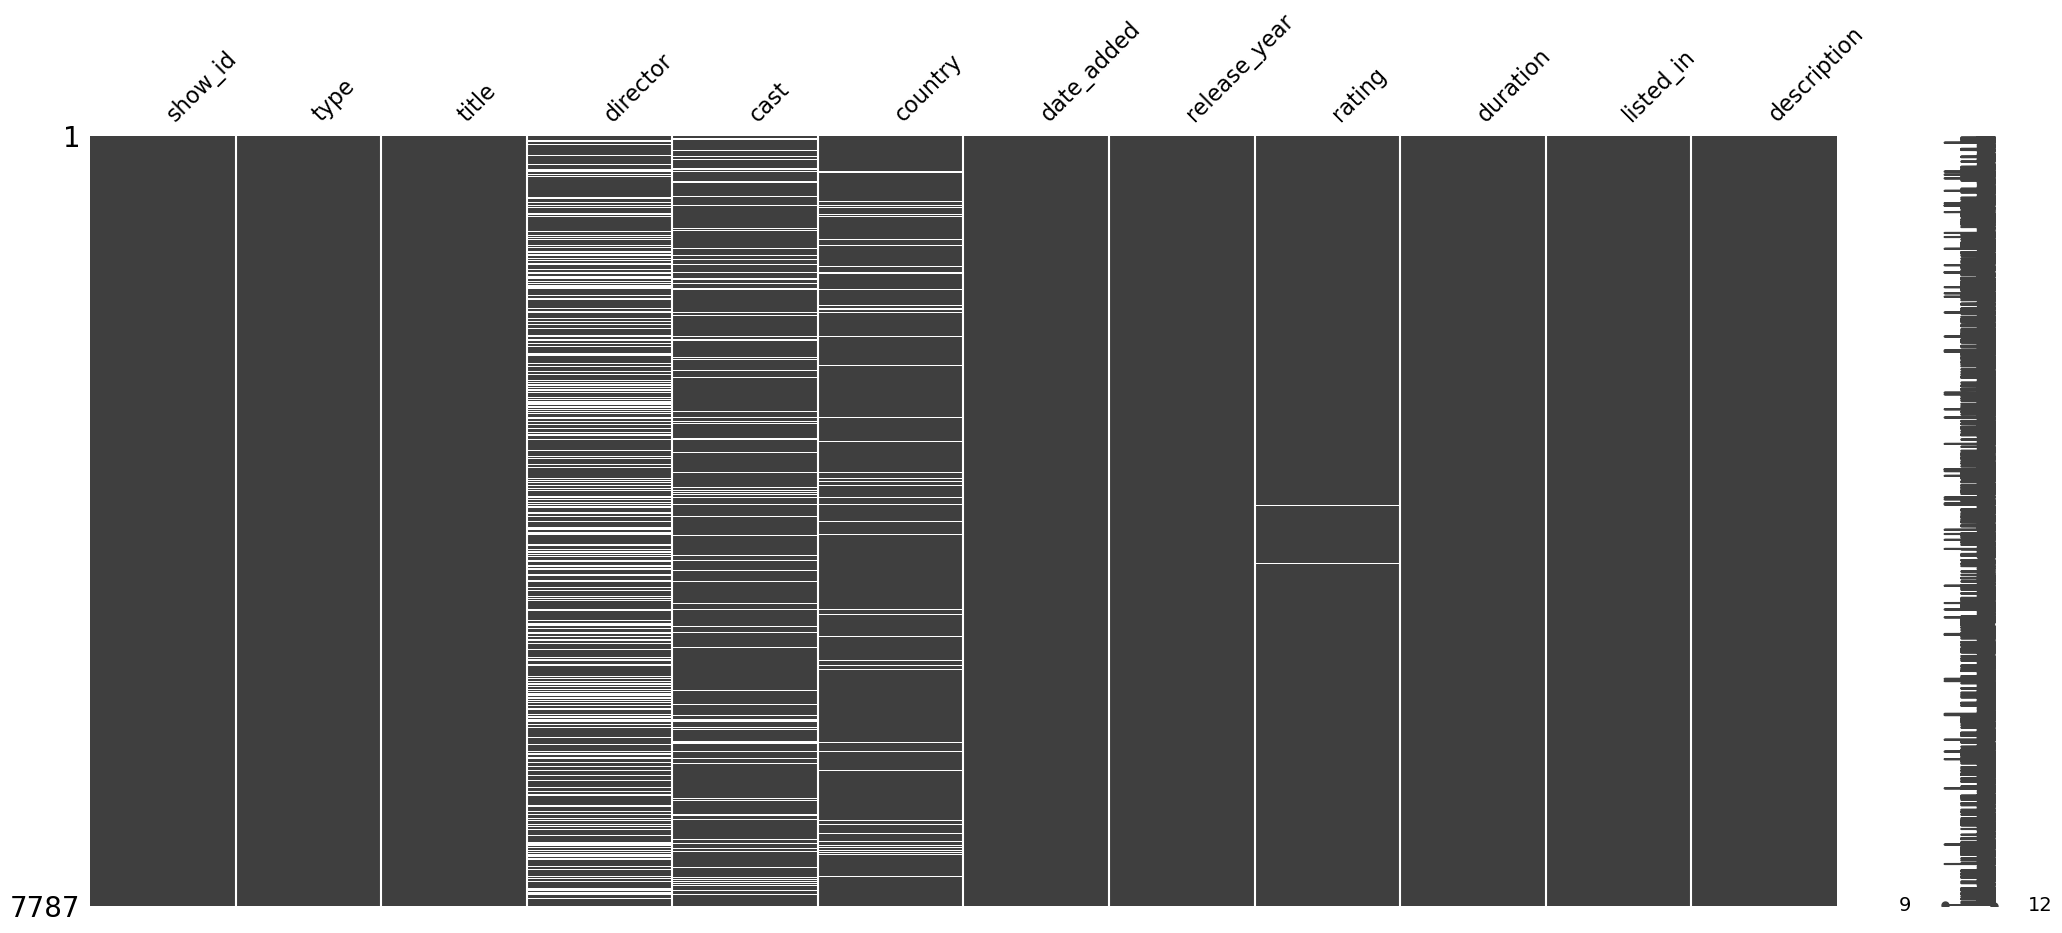

In [11]:
msno.matrix(netflix_df)

<Axes: >

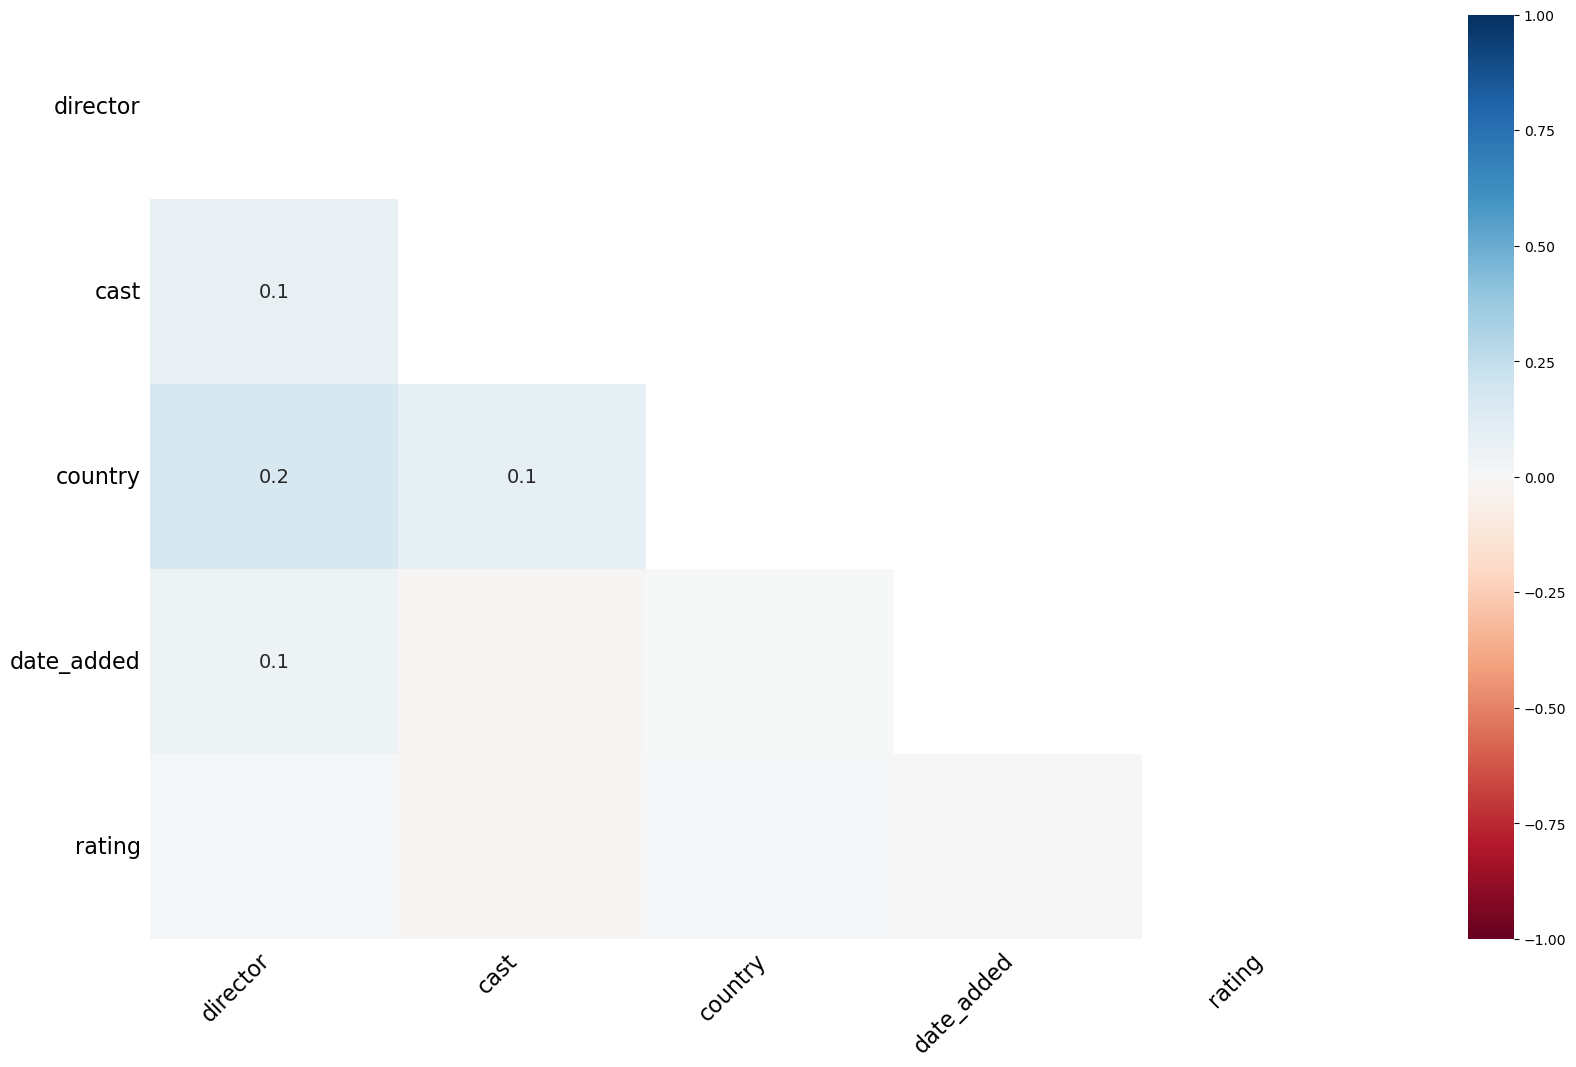

In [12]:
msno.heatmap(netflix_df)

In [13]:
netflix_df[netflix_df['rating'].isnull()]

show_id     type                                              title  \
67       s68    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
2359   s2360  TV Show                  Gargantia on the Verdurous Planet   
3660   s3661  TV Show                                       Little Lunch   
3736   s3737    Movie                                    Louis C.K. 2017   
3737   s3738    Movie                              Louis C.K.: Hilarious   
3738   s3739    Movie               Louis C.K.: Live at the Comedy Store   
4323   s4324    Movie                               My Honor Was Loyalty   

             director                                               cast  \
67                NaN                        Oprah Winfrey, Ava DuVernay   
2359              NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
3660              NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
3736       Louis C.K.                                         Louis C.K.   
3737       Louis C.K.                                         Louis C.K.   
3738       Louis C.K.                                         Louis C.K.   
4323  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

            country date_added  release_year rating  duration  \
67              NaN  26-Jan-17          2017    NaN    37 min   
2359          Japan   1-Dec-16          2013    NaN  1 Season   
3660      Australia   1-Feb-18          2015    NaN  1 Season   
3736  United States   4-Apr-17          2017    NaN    74 min   
3737  United States  16-Sep-16          2010    NaN    84 min   
3738  United States  15-Aug-16          2015    NaN    66 min   
4323          Italy   1-Mar-17          2015    NaN   115 min   

                                 listed_in  \
67                                  Movies   
2359  Anime Series, International TV Shows   
3660                 Kids' TV, TV Comedies   
3736                                Movies   
3737                                Movies   
3738                                Movies   
4323                                Dramas   

                                            description  
67    Oprah Winfrey sits down with director Ava DuVe...  
2359  After falling through a wormhole, a space-dwel...  
3660  Adopting a child's perspective, this show take...  
3736  Louis C.K. muses on religion, eternal love, gi...  
3737  Emmy-winning comedy writer Louis C.K. brings h...  
3738  The comic puts his trademark hilarious/thought...  
4323  Amid the chaos and horror of World War II, a c...

In [14]:
netflix_df['rating'].fillna(netflix_df['rating'].mode()[0], inplace = True)
netflix_df['rating'].isnull().sum()

0

In [15]:
netflix_df[netflix_df['date_added'].isnull()]

show_id     type                                        title director  \
258     s259  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
549     s550  TV Show              Anthony Bourdain: Parts Unknown      NaN   
2263   s2264  TV Show                                      Frasier      NaN   
2288   s2289  TV Show                                      Friends      NaN   
2555   s2556  TV Show                              Gunslinger Girl      NaN   
3374   s3375  TV Show                                     Kikoriki      NaN   
3492   s3493  TV Show                          La Familia P. Luche      NaN   
3946   s3947  TV Show                                        Maron      NaN   
5137   s5138  TV Show                                 Red vs. Blue      NaN   
6065   s6066  TV Show                 The Adventures of Figaro Pho      NaN   

                                                   cast         country  \
258   Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
549                                    Anthony Bourdain   United States   
2263  Kelsey Grammer, Jane Leeves, David Hyde Pierce...   United States   
2288  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   
2555  Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...           Japan   
3374                                      Igor Dmitriev             NaN   
3492  Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...   United States   
3946  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
5137  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   United States   
6065  Luke Jurevicius, Craig Behenna, Charlotte Haml...       Australia   

     date_added  release_year rating    duration  \
258         NaN          2013  TV-MA   2 Seasons   
549         NaN          2018  TV-PG   5 Seasons   
2263        NaN          2003  TV-PG  11 Seasons   
2288        NaN          2003  TV-14  10 Seasons   
2555        NaN          2008  TV-14   2 Seasons   
3374        NaN          2010   TV-Y   2 Seasons   
3492        NaN          2012  TV-14   3 Seasons   
3946        NaN          2016  TV-MA   4 Seasons   
5137        NaN          2015     NR  13 Seasons   
6065        NaN          2015  TV-Y7   2 Seasons   

                                              listed_in  \
258            British TV Shows, TV Comedies, TV Dramas   
549                                          Docuseries   
2263                     Classic & Cult TV, TV Comedies   
2288                     Classic & Cult TV, TV Comedies   
2555                       Anime Series, Crime TV Shows   
3374                                           Kids' TV   
3492  International TV Shows, Spanish-Language TV Sh...   
3946                                        TV Comedies   
5137  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6065                              Kids' TV, TV Comedies   

                                            description  
258   Set during the Russian Revolution, this comic ...  
549   This CNN original series has chef Anthony Bour...  
2263  Frasier Crane is a snooty but lovable Seattle ...  
2288  This hit sitcom follows the merry misadventure...  
2555  On the surface, the Social Welfare Agency appe...  
3374  A wacky rabbit and his gang of animal pals hav...  
3492  This irreverent sitcom featues Ludovico, Feder...  
3946  Marc Maron stars as Marc Maron, who interviews...  
5137  This parody of first-person shooter games, mil...  
6065  Imagine your worst fears, then multiply them: ...

In [16]:
netflix_df['date_added'].unique()

array(['14-Aug-20', '23-Dec-16', '20-Dec-18', ..., '6-Dec-18', '9-Mar-16',
       '11-Jan-20'], dtype=object)

In [17]:
data_list = netflix_df['title'][netflix_df['date_added'].isnull()].tolist()
data_list

["A Young Doctor's Notebook and Other Stories",
 'Anthony Bourdain: Parts Unknown',
 'Frasier',
 'Friends',
 'Gunslinger Girl',
 'Kikoriki',
 'La Familia P. Luche',
 'Maron',
 'Red vs. Blue',
 'The Adventures of Figaro Pho']

In [18]:
date_array = ['14-Aug-20', '23-Dec-16', '20-Dec-18', '9-Mar-16', '6-Dec-18', '11-Jan-20', 
                '6-Dec-18', '9-Mar-16', '11-Jan-20', '14-Aug-20']

In [19]:
title_date = dict(zip(data_list, date_array))
title_date

{"A Young Doctor's Notebook and Other Stories": '14-Aug-20',
 'Anthony Bourdain: Parts Unknown': '23-Dec-16',
 'Frasier': '20-Dec-18',
 'Friends': '9-Mar-16',
 'Gunslinger Girl': '6-Dec-18',
 'Kikoriki': '11-Jan-20',
 'La Familia P. Luche': '6-Dec-18',
 'Maron': '9-Mar-16',
 'Red vs. Blue': '11-Jan-20',
 'The Adventures of Figaro Pho': '14-Aug-20'}

In [20]:
netflix_df['date_added'] = netflix_df['title'].map(title_date).fillna(netflix_df['date_added'])
netflix_df['date_added'].isnull().sum()

0

In [21]:
netflix_df[netflix_df['title'].isin(data_list)]

show_id     type                                        title director  \
258     s259  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
549     s550  TV Show              Anthony Bourdain: Parts Unknown      NaN   
2263   s2264  TV Show                                      Frasier      NaN   
2288   s2289  TV Show                                      Friends      NaN   
2555   s2556  TV Show                              Gunslinger Girl      NaN   
3374   s3375  TV Show                                     Kikoriki      NaN   
3492   s3493  TV Show                          La Familia P. Luche      NaN   
3946   s3947  TV Show                                        Maron      NaN   
5137   s5138  TV Show                                 Red vs. Blue      NaN   
6065   s6066  TV Show                 The Adventures of Figaro Pho      NaN   

                                                   cast         country  \
258   Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
549                                    Anthony Bourdain   United States   
2263  Kelsey Grammer, Jane Leeves, David Hyde Pierce...   United States   
2288  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   
2555  Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...           Japan   
3374                                      Igor Dmitriev             NaN   
3492  Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...   United States   
3946  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
5137  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   United States   
6065  Luke Jurevicius, Craig Behenna, Charlotte Haml...       Australia   

     date_added  release_year rating    duration  \
258   14-Aug-20          2013  TV-MA   2 Seasons   
549   23-Dec-16          2018  TV-PG   5 Seasons   
2263  20-Dec-18          2003  TV-PG  11 Seasons   
2288   9-Mar-16          2003  TV-14  10 Seasons   
2555   6-Dec-18          2008  TV-14   2 Seasons   
3374  11-Jan-20          2010   TV-Y   2 Seasons   
3492   6-Dec-18          2012  TV-14   3 Seasons   
3946   9-Mar-16          2016  TV-MA   4 Seasons   
5137  11-Jan-20          2015     NR  13 Seasons   
6065  14-Aug-20          2015  TV-Y7   2 Seasons   

                                              listed_in  \
258            British TV Shows, TV Comedies, TV Dramas   
549                                          Docuseries   
2263                     Classic & Cult TV, TV Comedies   
2288                     Classic & Cult TV, TV Comedies   
2555                       Anime Series, Crime TV Shows   
3374                                           Kids' TV   
3492  International TV Shows, Spanish-Language TV Sh...   
3946                                        TV Comedies   
5137  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6065                              Kids' TV, TV Comedies   

                                            description  
258   Set during the Russian Revolution, this comic ...  
549   This CNN original series has chef Anthony Bour...  
2263  Frasier Crane is a snooty but lovable Seattle ...  
2288  This hit sitcom follows the merry misadventure...  
2555  On the surface, the Social Welfare Agency appe...  
3374  A wacky rabbit and his gang of animal pals hav...  
3492  This irreverent sitcom featues Ludovico, Feder...  
3946  Marc Maron stars as Marc Maron, who interviews...  
5137  This parody of first-person shooter games, mil...  
6065  Imagine your worst fears, then multiply them: ...

In [22]:
netflix_df[netflix_df['country'].isnull()].head()

show_id     type                                              title  \
16      s17  TV Show                                              9-Feb   
38      s39  TV Show                                แผนร้ายนายเจ้าเล่ห์   
67      s68    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
97      s98    Movie                                        3 Deewarein   
117    s118    Movie                                     5 Cowok Jagoan   

            director                                               cast  \
16               NaN  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...   
38               NaN  Chutavuth Pattarakampol, Sheranut Yusananda, N...   
67               NaN                        Oprah Winfrey, Ava DuVernay   
97   Nagesh Kukunoor  Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...   
117     Anggy Umbara  Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...   

    country date_added  release_year rating  duration  \
16      NaN  20-Mar-19          2018  TV-14  1 Season   
38      NaN  30-Mar-19          2016  TV-14  1 Season   
67      NaN  26-Jan-17          2017  TV-MA    37 min   
97      NaN  31-Dec-19          2003  TV-MA   121 min   
117     NaN   5-Jan-19          2017  TV-MA   106 min   

                                             listed_in  \
16                   International TV Shows, TV Dramas   
38   International TV Shows, Romantic TV Shows, TV ...   
67                                              Movies   
97             Dramas, International Movies, Thrillers   
117  Action & Adventure, Comedies, International Mo...   

                                           description  
16   As a psychology professor faces Alzheimer's, h...  
38   When two brothers fall for two sisters, they q...  
67   Oprah Winfrey sits down with director Ava DuVe...  
97   A reporter interviews three convicts on death ...  
117  Yanto asks his friends to help save a girlfrie...

In [23]:
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

In [24]:
netflix_df['cast'].replace(np.nan, 'No Data',inplace  = True)

In [25]:
netflix_df['director'].replace(np.nan, 'No Data',inplace  = True)

In [26]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

##### Working on the Satisfaction Level.

In [27]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [28]:
netflix_df['director'].value_counts()[1: 11]

director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Lance Bangs                8
Name: count, dtype: int64

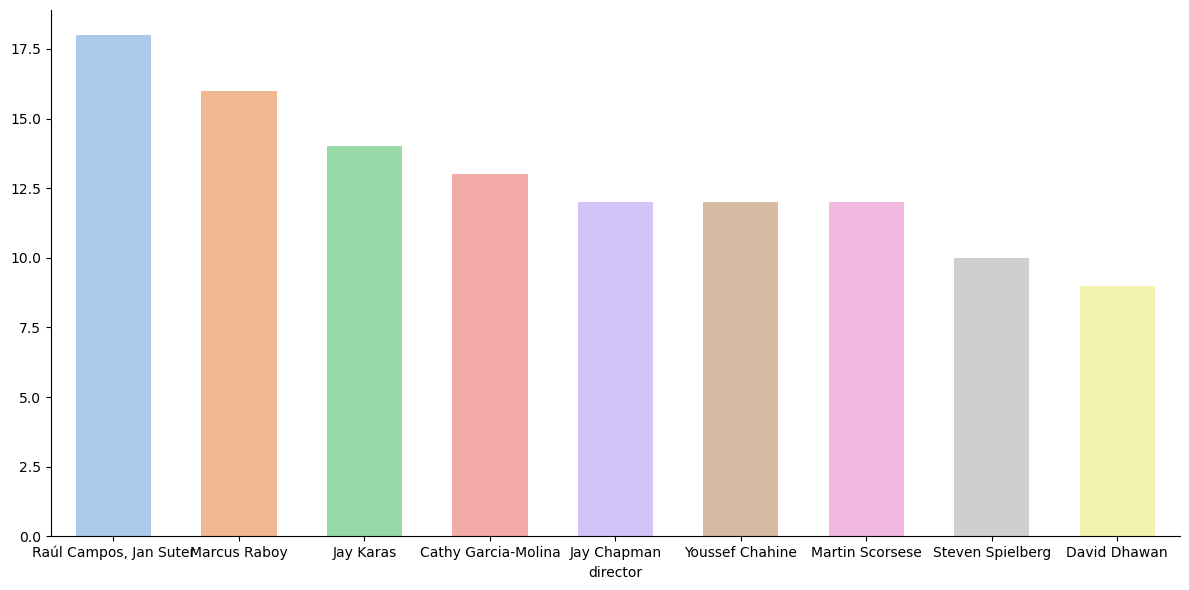

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

country_counts = netflix_df.groupby('director').size().sort_values(ascending=False)[1:10]

plt.figure(figsize = [12, 6])
color_map = sns.color_palette("pastel", 10)
# color_map[:3] = ['#E50914'] * 3  # Keep the top 3 bars red

sns.barplot(
    x = country_counts.index, 
    y = country_counts.values, 
    palette = color_map, 
    linewidth = 0.6,
    width = 0.6
)
sns.despine()
plt.tight_layout()
plt.show()

In [30]:
netflix_df[['date_added', 'release_year']].head()

date_added  release_year
0  14-Aug-20          2020
1  23-Dec-16          2016
2  20-Dec-18          2011
3  16-Nov-17          2009
4   1-Jan-20          2008

In [31]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['release_year'] = pd.to_numeric(netflix_df['release_year'], errors='coerce')

year_added_counts = netflix_df['year_added'].value_counts().sort_index()
release_year_counts = netflix_df['release_year'].value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=year_added_counts.index,
    y=year_added_counts.values,
    mode='lines+markers',
    name='Year Added',
    line=dict(color='#E50914', width=3)
))

fig.add_trace(go.Scatter(
    x=release_year_counts.index,
    y=release_year_counts.values,
    mode='lines+markers',
    name='Release Year',
    line=dict(color='#FFFFFF', width=3)
))

fig.update_layout(
    title='Netflix Content Added vs Release Year Over Time',
    xaxis_title='Year',
    yaxis_title='Number of Titles',
    template='plotly_dark',
    legend=dict(x=0.8, y=1),
    width=900,
    height=500
)

fig.show()


In [32]:
netflix_df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               No Data  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            No Data                                            Nasty C   
7785            No Data                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            No Data   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                      United States 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  year_added  
0     In a future where the elite inhabit an island ...        2020  
1     After a devastating earthquake hits Mexico Cit...        2016  
2     When an army recruit is foun

In [33]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added'],
      dtype='object')

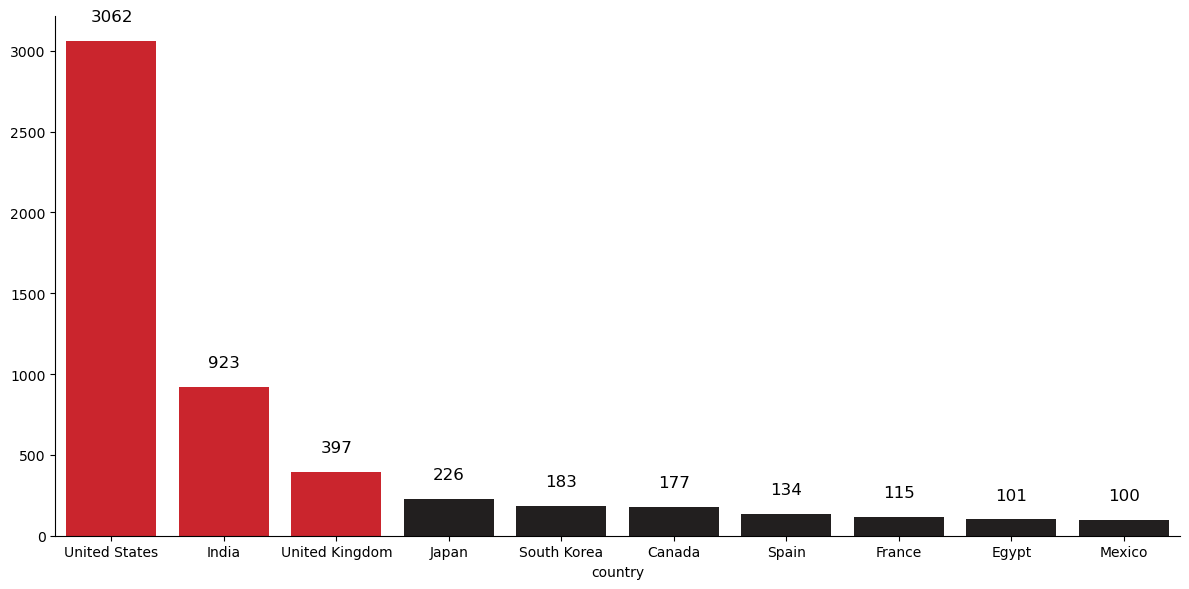

In [34]:
country_counts = netflix_df.groupby('country').size().sort_values(ascending=False)[:10]

plt.figure(figsize=[12, 6])
color_map = ['#221F1F' for _ in range(10)]
color_map[:3] = ['#E50914'] * 3

sns.barplot(
    x = country_counts.index, 
    y = country_counts.values, 
    palette = color_map, 
    linewidth=0.6
)

for i, count in enumerate(country_counts.values):
    plt.text(i, count + 150, f"{count}", ha='center', va='center', fontweight='light', fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

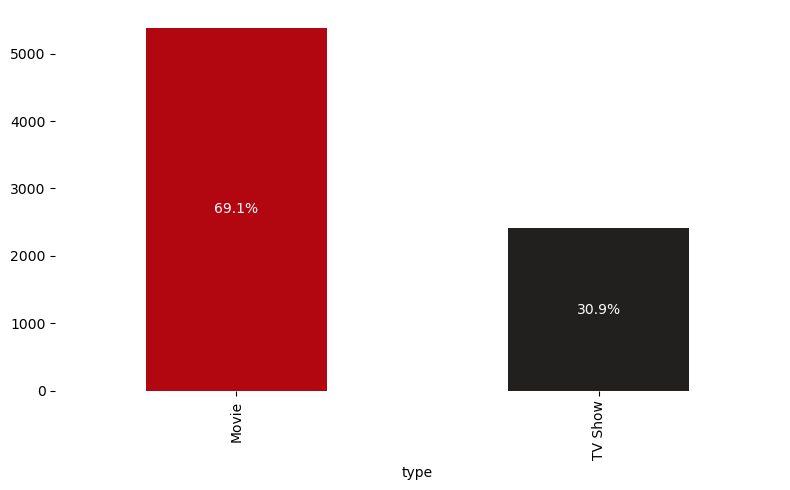

In [35]:
type_counts = netflix_df['type'].value_counts()
percentages = (type_counts / type_counts.sum()) * 100
ax = type_counts.plot(kind='bar', color=['#b20710', '#221f1f'], figsize=(8, 5))
for i, count in enumerate(type_counts):
    ax.text(i, count / 2, f'{percentages[i]:.1f}%', ha='center', va='center', color='white')
    
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.tight_layout()
plt.show()

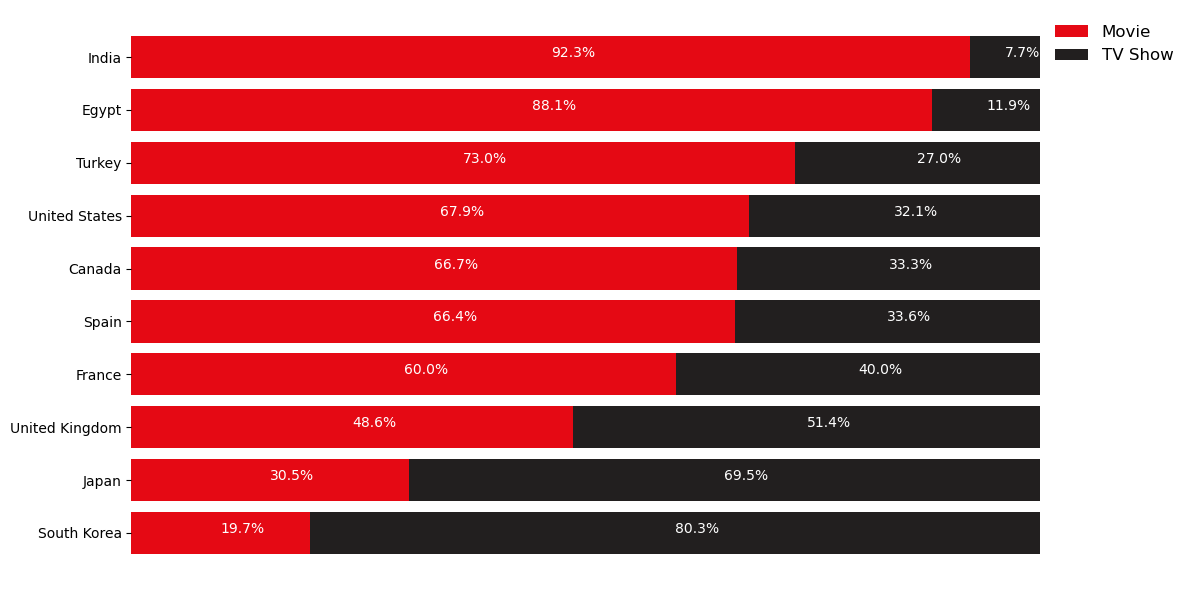

In [36]:
countries = netflix_df['country'].value_counts()[:10].index
data = netflix_df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[countries]
data = data.div(data.sum(axis=1), axis=0)[['Movie', 'TV Show']].sort_values(by='Movie', ascending=True)

fig, ax = plt.subplots(figsize=[12, 6])
ax.barh(data.index, data['Movie'], color='#E50914', label='Movie')  # Netflix Red
ax.barh(data.index, data['TV Show'], left=data['Movie'], color='#221F1F', label='TV Show')  # Netflix Black

for i in data.index:
    ax.annotate(f"{data['Movie'][i]*100:.1f}%", xy=(data['Movie'][i]/2, i), color='white')
    ax.annotate(f"{data['TV Show'][i]*100:.1f}%", xy=(data['Movie'][i] + data['TV Show'][i]/2, i), color='white')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

ax.legend(loc = 'upper left', fontsize=12, frameon=False, bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [37]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added'],
      dtype='object')

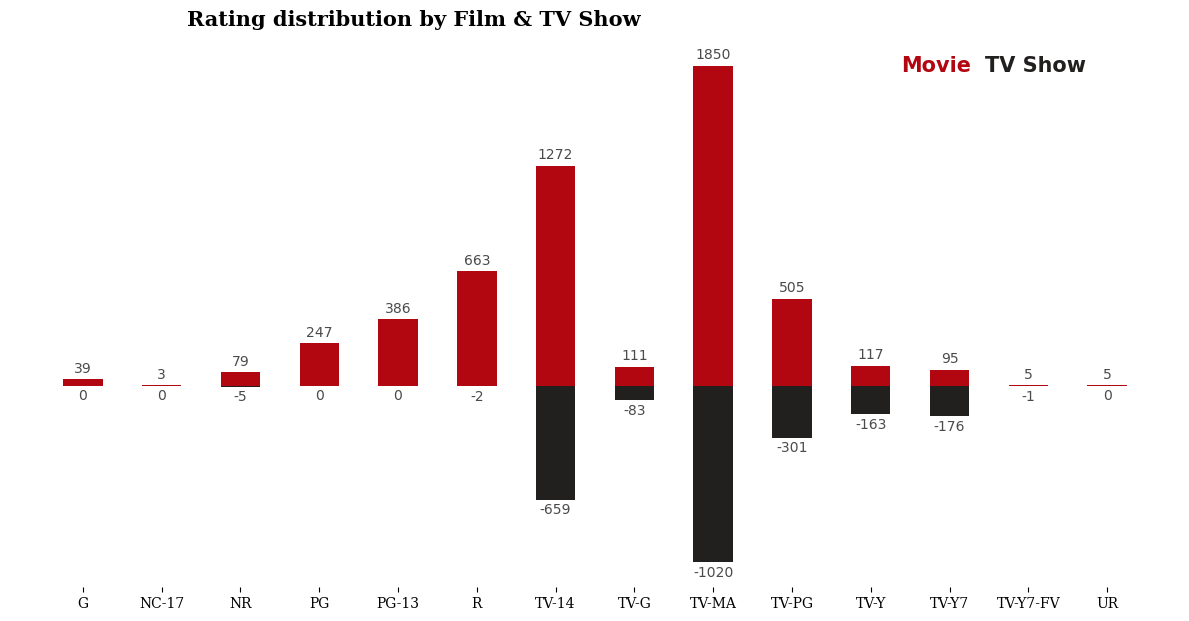

In [38]:
mf = netflix_df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(mf.loc['Movie'].index, mf.loc['Movie'], width=0.5, color='#b20710')
ax.bar(mf.loc['TV Show'].index, -mf.loc['TV Show'], width=0.5, color='#221f1f')

for i, (movie, tv) in enumerate(zip(mf.loc['Movie'], mf.loc['TV Show'])):
    ax.annotate(f"{movie}", xy=(mf.columns[i], movie + 60), va='center', ha='center', color='#4a4a4a')
    ax.annotate(f"{-tv}", xy=(mf.columns[i], -tv - 60), va='center', ha='center', color='#4a4a4a')

ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])

fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.755, 0.924, "Movie", fontsize=15, fontweight="bold", color='#b20710')
fig.text(0.825, 0.924, "TV Show", fontsize=15, fontweight="bold", color='#221f1f')

plt.tight_layout()
plt.show()

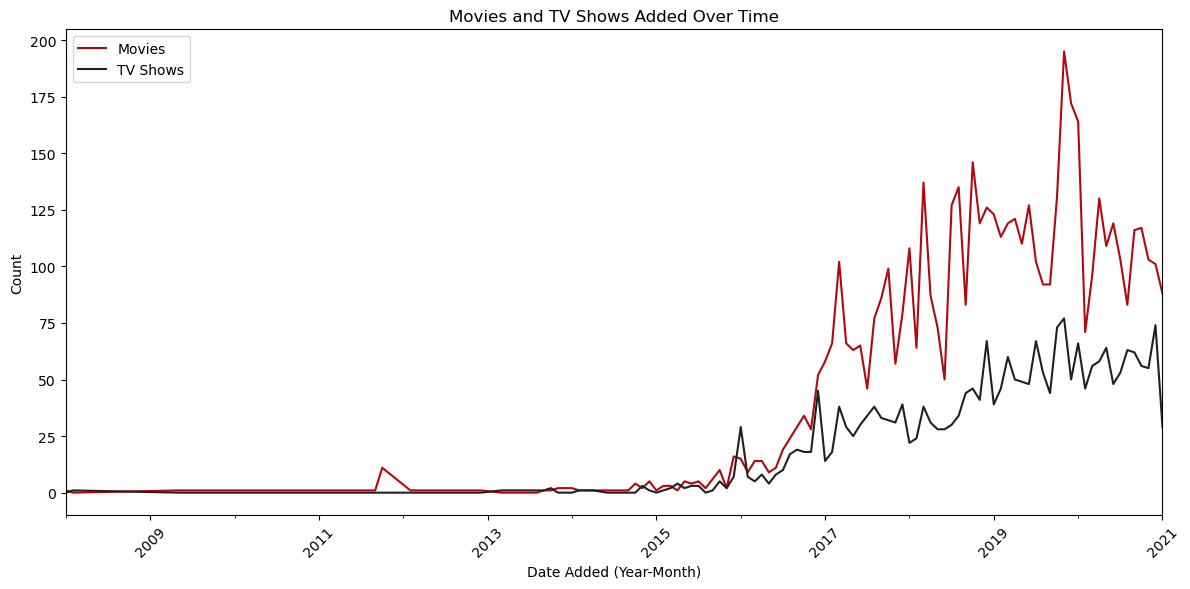

In [39]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

netflix_df['year_month'] = netflix_df['date_added'].dt.to_period('M')

monthly_counts = netflix_df.groupby(['year_month', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))
monthly_counts['Movie'].plot(kind='line', ax=ax, color='#b20710', label='Movies')
monthly_counts['TV Show'].plot(kind='line', ax=ax, color='#221f1f', label='TV Shows')

ax.set_xlabel('Date Added (Year-Month)')
ax.set_ylabel('Count')
ax.set_title('Movies and TV Shows Added Over Time')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

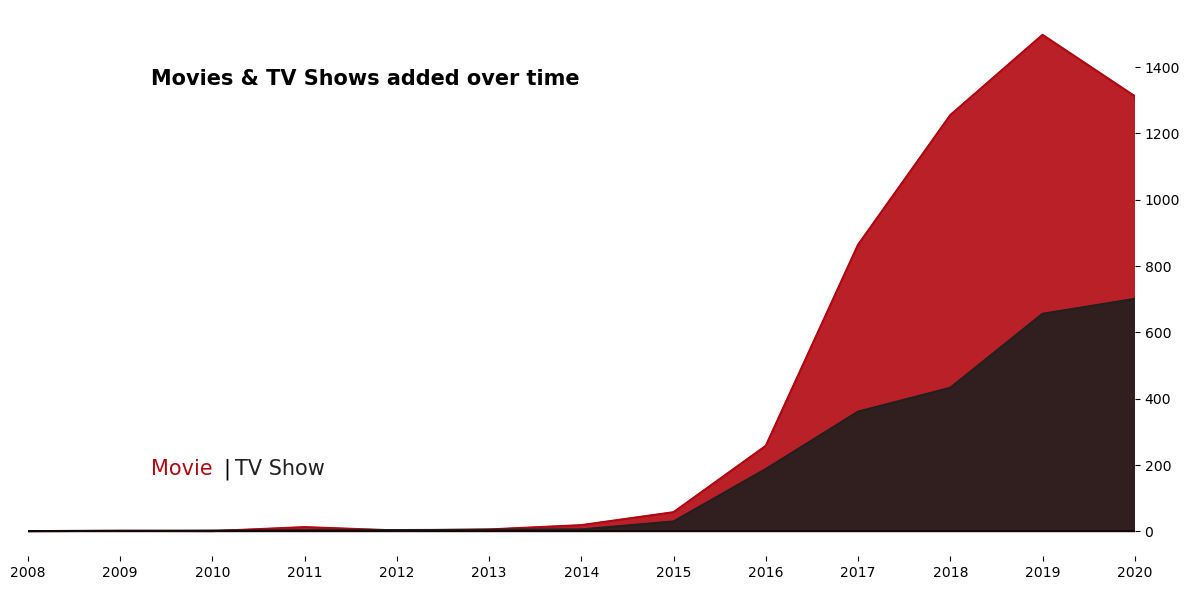

In [40]:
netflix_df['year_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce').dt.year
fig, ax = plt.subplots(figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(netflix_df['type'].value_counts().index):
    mtv_rel = netflix_df[netflix_df['type'] == mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

ax.axhline(0, color='black', linewidth=1.3, alpha=0.7)
ax.set_xlim(2008, 2020)
plt.xticks(np.arange(2008, 2021, 1))

for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

ax.yaxis.tick_right()
ax.grid(False)

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold')
fig.text(0.13, 0.2, "Movie", fontsize=15, color='#b20710')
fig.text(0.19, 0.2, "|", fontsize=15)
fig.text(0.2, 0.2, "TV Show", fontsize=15, color='#221f1f')

plt.tight_layout()
plt.show()

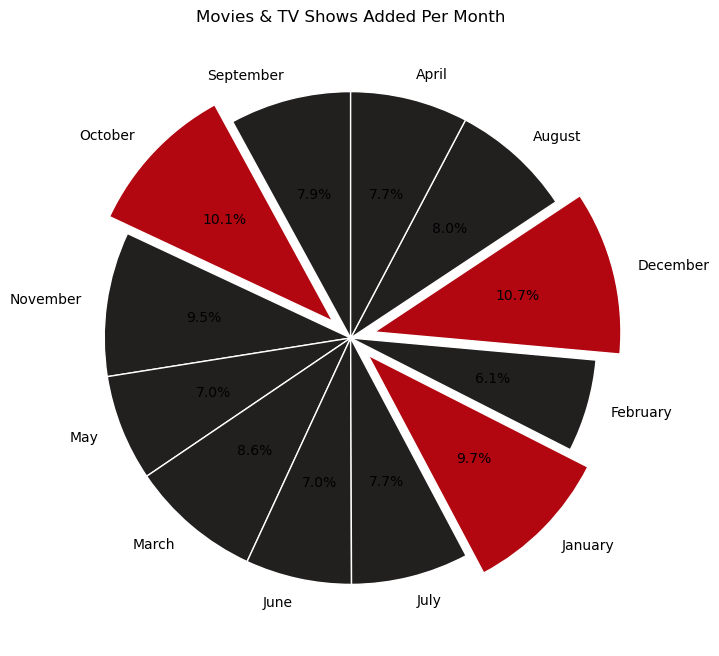

In [41]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['month_name_added'] = netflix_df['date_added'].dt.month_name()

data = netflix_df['month_name_added'].value_counts().reset_index()
data.columns = ['month_name_added', 'Value']

df_polar = data.sort_values(by='month_name_added', ascending=False)

top_3_months = df_polar.nlargest(3, 'Value')['month_name_added']
color_map = ['#b20710' if month in top_3_months.values else '#221f1f' for month in df_polar['month_name_added']]

explode = [0.1 if month in top_3_months.values else 0 for month in df_polar['month_name_added']]

plt.figure(figsize=(8,8))
plt.pie(df_polar['Value'], labels=df_polar['month_name_added'], 
        autopct='%1.1f%%', startangle=90, colors=color_map, 
        explode=explode, wedgeprops={'edgecolor': 'white'}, textprops={'color': 'black'})
plt.title('Movies & TV Shows Added Per Month')
plt.show()

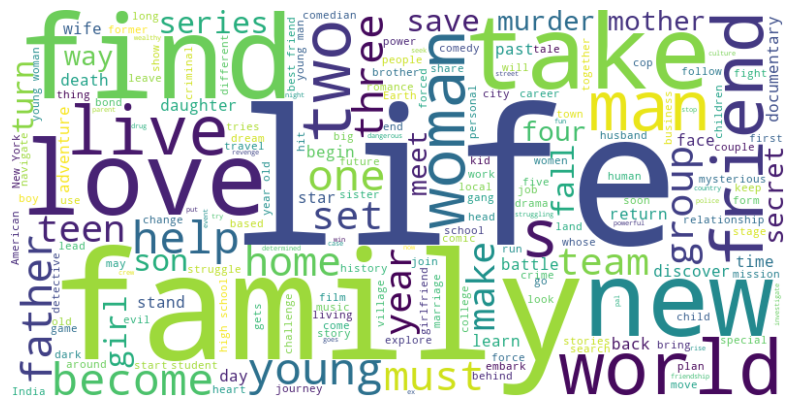

In [44]:
text = " ".join(netflix_df['description'].dropna())
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

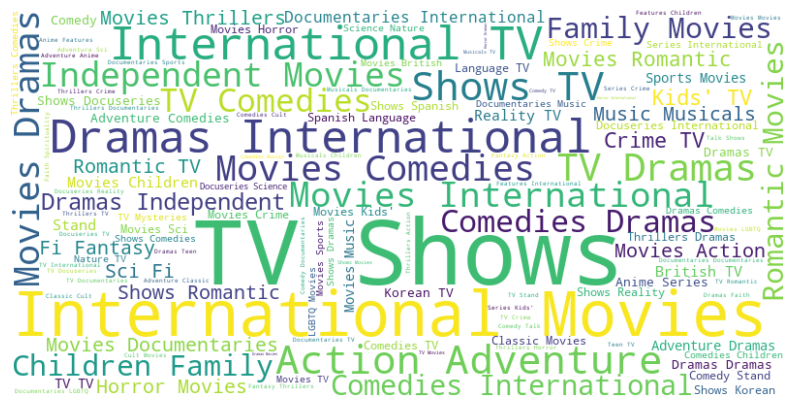

In [45]:
text = " ".join(netflix_df['listed_in'].dropna())
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

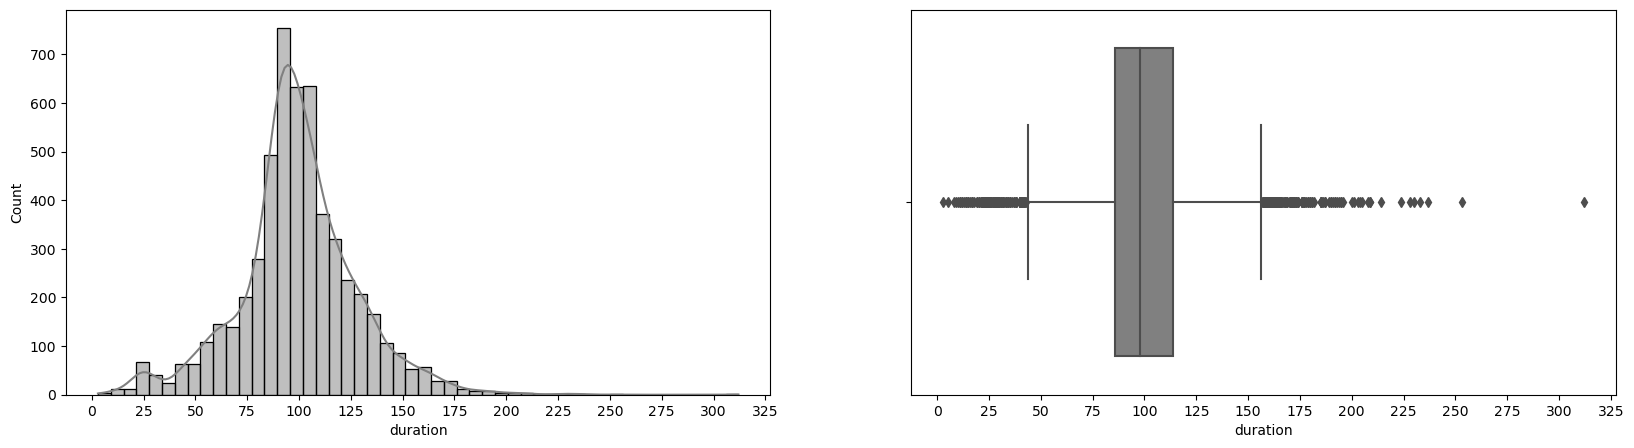

In [59]:
movie_durations = netflix_df[netflix_df['duration'].str.contains('min')]['duration'].str.split().str[0].astype(int)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))
sns.histplot(movie_durations, kde = True, color = "gray", bins = 50, ax = ax1).set(xticks = np.arange(0, 350, 25))
sns.boxplot(x = movie_durations, color = "gray", ax = ax2).set_xticks(np.arange(0, 350, 25))
plt.show()

In [62]:
netflix_df['listed_in'].value_counts().head(10)

listed_in
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: count, dtype: int64

In [65]:
top_10_categories = netflix_df['listed_in'].value_counts().head(10)

fig = go.Figure(data=[go.Pie(
    labels = top_10_categories.index,
    values = top_10_categories.values,
    hole = 0.3,
    textinfo = 'percent+label',
    hoverinfo = 'label+percent',
    marker = dict(colors=plt.cm.Paired.colors[:10], line=dict(color='white', width=2))  # Color and border
)])

fig.update_layout(
    title = 'Top 10 Most Frequent Categories in Netflix Content',
    title_x = 0.5,
    template = 'plotly_dark',
    showlegend = True
)
fig.show()

In [46]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'year_month', 'month_name_added'],
      dtype='object')

##### Summary and Recommendations:
    - Netflix's content library shows a clear preference for Movies, which are added more frequently than TV Shows. 
    After 2019, there is a noticeable decline in content added, with the drop being more significant in 
    Movies compared to TV Shows. The highest number of titles are typically added in October, November, and December, 
    with Friday and Thursday being the most common days for uploads. The United States leads in content addition, 
    followed by India, United Kingdom, Canada, France, and Japan. Popular genres across both Movies and TV Shows 
    include International Movies, Dramas, Comedies, and TV Dramas.

    - When it comes to Movies, Netflix should focus on emerging countries such as India, United Kingdom, Canada, 
    and France, particularly for adult audiences. The recommended movie duration is between 80-120 minutes, 
    with a preference for genres like International Movies, Dramas, and Comedies. For TV Shows, Netflix should 
    target regions like Japan, South Korea, Canada, and France, focusing on shows with up to 3 seasons. 
    Popular genres for TV Shows include International TV Shows, TV Dramas, and TV Comedies.